In [4]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [5]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # Compute the fft of the image and shift the fft spectrum to the center
    fft_image = np.fft.fftshift(np.fft.fft2(im))

    # Shift the kernel's fft spectrum to the center
    fft_kernel = np.fft.fftshift(fft_kernel)
    
    # Filter the image in frequency domain
    fft_filtered_image = fft_image * fft_kernel

    # Obtain the processed image in spatial domain
    conv_result = np.fft.ifft2(np.fft.ifftshift(fft_filtered_image)).real

    # Shift the results to center and compute the log of the magnitude as well as inverse fft
    fft_image_mag = np.log(1 + np.abs(fft_image))
    fft_filtered_image_mag = np.log(1 + np.abs(fft_filtered_image))

    # Normalize the intenisty values of the filtered image from an intensity range of -x and +y to 0 and 1
    conv_result = (conv_result - np.min(conv_result))/(np.max(conv_result)-np.min(conv_result))

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title('Original Image')

        # Visualize FFT
        plt.subplot(1, 5, 2) 
        plt.imshow(fft_image_mag, cmap="gray")
        plt.title("Shifted FFT Image")

        # Visualize FFT kernel
        plt.subplot(1, 5, 3)
        plt.imshow(fft_kernel, cmap="gray")
        plt.title("Shifted FFT Kernel")

        # Visualize filtered FFT image
        plt.subplot(1, 5, 4)
        plt.imshow(fft_filtered_image_mag, cmap="gray")
        plt.title("Filtered FFT Image")

        # Visualize filtered spatial image
        plt.subplot(1, 5, 5) 
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
    
    a, b = fft_kernel.shape
    if fft_kernel[a//2, b//2] == 0:
        plt.savefig(utils.image_output_dir.joinpath('task_4a_high_pass.png'))
    else:
        plt.savefig(utils.image_output_dir.joinpath('task_4a_low_pass.png'))
    ### END YOUR CODE HERE ###
    return conv_result

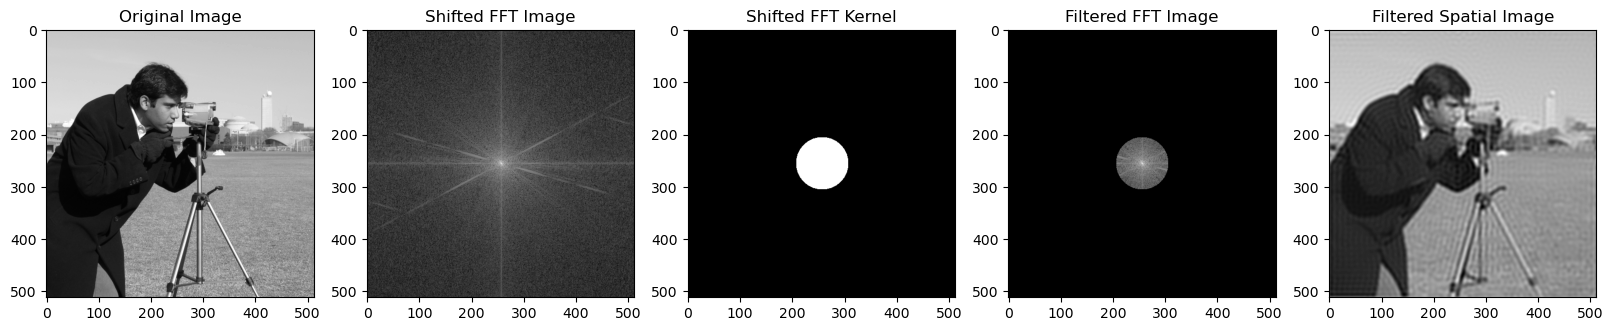

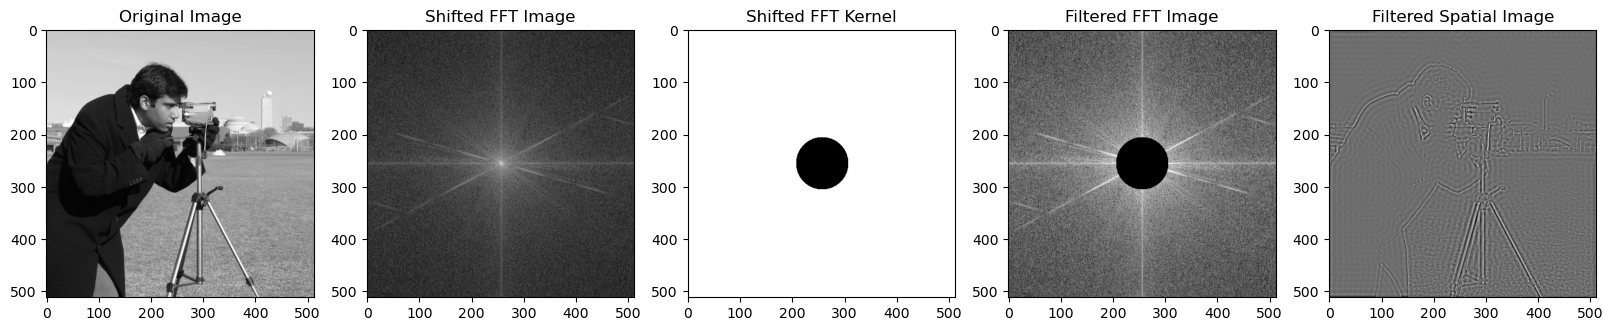

Saving image to: image_processed/camera_low_pass.png
Saving image to: image_processed/camera_high_pass.png


In [6]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)